# 1.Audio seperation

### Install components, such as librosa

In [ ]:
!pip install librosa

### Download model and python scripts for pytorch implemented spleeter from my github

In [ ]:
import os
import zipfile

from pathlib import Path

import requests
import sys
from IPython.display import Audio
import librosa
import torch


In [ ]:
spleeter_path = Path("spleeter/")
spleeter_model_path = spleeter_path / "model"
spleeter_script_path = spleeter_path/ "scripts"
spleeter_audio_path = spleeter_path/ "audio"


In [ ]:
spleeter_pretrained_download_path = "https://github.com/deezer/spleeter/releases/download/v1.4.0/2stems.tar.gz"
spleeter_pretrained_file = "2stems.tar.gz"
# spleeter_pretrained_download_path = "https://github.com/deezer/spleeter/releases/download/v1.4.0/4stems.tar.gz"
# spleeter_pretrained_file = "4stems.tar.gz"
# spleeter_pretrained_download_path = "https://github.com/deezer/spleeter/releases/download/v1.4.0/5stems.tar.gz"
# spleeter_pretrained_file = "5stems.tar.gz"

In [ ]:

# If the image folder doesn't exist, download it and prepare it...
if spleeter_path.is_dir():
    print(f"{spleeter_path} directory exists.")
else:
    print(f"Did not find {spleeter_path} directory, creating one...")
    spleeter_path.mkdir(parents=True, exist_ok=True)
    spleeter_model_path.mkdir(parents=True, exist_ok=True)
    # spleeter_audio_path.mkdir(parents=True, exist_ok=True)
    # spleeter_script_path.mkdir(parents=True, exist_ok=True)

# Download data
file_path = spleeter_path / spleeter_pretrained_file
if not file_path.exists():
    print(f"{spleeter_pretrained_file} does not exist. Downloading...")

    # Download file
    response = requests.get(spleeter_pretrained_download_path)
    if response.status_code == 200:
        with open(file_path, "wb") as f:
            f.write(response.content)
        print("Download complete.")

        # Unzip file
        print("Unzipping...")
        !tar -xzf {file_path} -C {spleeter_model_path}
        print("Unzipping complete.")

        # Delete .tar.gz file
        os.remove(file_path)
        print(f"Removed {file_path}.")
    else:
        print(f"Failed to download {spleeter_pretrained_file}. Check the URL and try again.")
else:
    print(f"{spleeter_pretrained_file} already exists. Skipping download.")


Did not find spleeter directory, creating one...
2stems.tar.gz does not exist. Downloading...
Download complete.
Unzipping...
Unzipping complete.
Removed spleeter/2stems.tar.gz.


In [ ]:
# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from spleeter.ptspleeter import unet
    print("Import code from pytorch version of spleeter")
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find scripts... downloading them from GitHub.")
    !git clone https://github.com/wj-bj/deep-learning-music-practice.git
    !mv deep-learning-music-practice/ptspleeter spleeter
    !mv deep-learning-music-practice/audio/dataset dataset
    !mv deep-learning-music-practice/audio spleeter

    # !rm -rf deep-learning-music-practice
    # from spleeter.scripts import unet

[INFO] Couldn't find scripts... downloading them from GitHub.
Cloning into 'deep-learning-music-practice'...
remote: Enumerating objects: 35, done.
remote: Total 35 (delta 0), reused 0 (delta 0), pack-reused 35
Receiving objects: 100% (35/35), 116.96 MiB | 19.98 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [ ]:

sys.path.append('/content/spleeter/ptspleeter')



### Seperate audio file with model

In [ ]:
fpath_src = "spleeter/audio/over_input.wav"
data1, sample_rate = librosa.load(fpath_src,duration=60)

Audio(data=data1,rate=sample_rate)

In [ ]:
import run


In [ ]:
run.split(model_path=spleeter_model_path, input="spleeter/audio/over_input.wav")

Writing output/over_input_vocals.wav
Writing output/over_input_accompaniment.wav


In [ ]:
directory_to_search = 'output'

file_paths = []

# use os.walk to get the paths of files
for root, dirs, files in os.walk(directory_to_search):
    for file in files:
        # 将文件路径加入到列表中
        file_paths.append(os.path.join(root, file))

print(file_paths)
for file in file_paths:
    print(file)
    data1, sample_rate = librosa.load(file,duration=60)
    display(Audio(data=data1,rate=sample_rate))


['output/over_input_vocals.wav', 'output/over_input_accompaniment.wav']
output/over_input_vocals.wav


output/over_input_accompaniment.wav


In [ ]:
# !rm -r output/

In [ ]:

# !rm -r spleeter/

# 2. Instrument classification

## 2.1 Import Library

In [ ]:
import torch
import torchaudio
import pandas as pd
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

import IPython.display as ipd
import matplotlib.pyplot as plt
import os
from pathlib import Path


##2.2 Import DataSet

In [ ]:
# !git clone https://github.com/wj-bj/deep-learning-music-practice.git
# !mv deep-learning-music-practice/audio/dataset dataset
# !rm -rf deep-learning-music-practice

### Unzip training files into dataset folder

In [ ]:
import zipfile
dataset_file = "wavfiles.zip"
dataset_path = Path("dataset/")
dataset_file_path = dataset_path / dataset_file

# If the folder doesn't exist, download it and prepare it...
if dataset_file_path.exists():
    print(f"Did  find {dataset_file_path} file.")
    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(dataset_file_path, "r") as zip_ref:
        print("Unzipping data...")
        zip_ref.extractall(dataset_path)

    # Remove .zip file
    # os.remove(data_path / "pizza_steak_sushi.zip")

Did  find dataset/wavfiles.zip file.
Unzipping data...


### Walk through the folder and files recursivly, create Panda dataframe varible to load the information of annotation, because there is no .csv file. Therefore, it should be generated in terms of the hierachy of file directory.

In [ ]:
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} files in '{dirpath}'.")
dataset_trained_path = Path("dataset/wavfiles/")
walk_through_dir(dataset_trained_path)

There are 10 directories and 0 files in 'dataset/wavfiles'.
There are 0 directories and 30 files in 'dataset/wavfiles/Flute'.
There are 0 directories and 30 files in 'dataset/wavfiles/Clarinet'.
There are 0 directories and 30 files in 'dataset/wavfiles/Saxophone'.
There are 0 directories and 30 files in 'dataset/wavfiles/Acoustic_guitar'.
There are 0 directories and 30 files in 'dataset/wavfiles/Double_bass'.
There are 0 directories and 30 files in 'dataset/wavfiles/Cello'.
There are 0 directories and 30 files in 'dataset/wavfiles/Hi_hat'.
There are 0 directories and 30 files in 'dataset/wavfiles/Snare_drum'.
There are 0 directories and 30 files in 'dataset/wavfiles/Bass_drum'.
There are 0 directories and 30 files in 'dataset/wavfiles/Violin_or_fiddle'.


In [ ]:
def list_files_with_dirnames(root_dir):
    data = []
    id = 0
    for dirpath, _, filenames in os.walk(root_dir):
        dirname = os.path.basename(dirpath)

        for filename in filenames:
            filepath = os.path.join(dirpath, filename)
            data.append([dirname, filename, filepath,id])
        if len(filenames)>0:
          id = id+1

    df = pd.DataFrame(data, columns=['Directory', 'File_Name','File_Path','ClassID'])
    return df
# construct classname2id, classid2name
def construct_class_mappings(df):
    class_names = df['Directory'].unique()
    classname2id = {class_name: id for id, class_name in enumerate(class_names)}
    classid2name = {id: class_name for class_name, id in classname2id.items()}

    return classid2name, classname2id

directory_path = dataset_trained_path
df = list_files_with_dirnames(directory_path)
classid2name, classname2id = construct_class_mappings(df)

print("Class ID to Name Mapping:", classid2name)
print("Class Name to ID Mapping:", classname2id)
df

Class ID to Name Mapping: {0: 'Flute', 1: 'Clarinet', 2: 'Saxophone', 3: 'Acoustic_guitar', 4: 'Double_bass', 5: 'Cello', 6: 'Hi_hat', 7: 'Snare_drum', 8: 'Bass_drum', 9: 'Violin_or_fiddle'}
Class Name to ID Mapping: {'Flute': 0, 'Clarinet': 1, 'Saxophone': 2, 'Acoustic_guitar': 3, 'Double_bass': 4, 'Cello': 5, 'Hi_hat': 6, 'Snare_drum': 7, 'Bass_drum': 8, 'Violin_or_fiddle': 9}


Directory     File_Name  \
0               Flute  8986cced.wav   
1               Flute  562d93f5.wav   
2               Flute  ca8653d2.wav   
3               Flute  5d73ee6f.wav   
4               Flute  84f5b84b.wav   
..                ...           ...   
295  Violin_or_fiddle  7eb9dac0.wav   
296  Violin_or_fiddle  68589f79.wav   
297  Violin_or_fiddle  2e4a9850.wav   
298  Violin_or_fiddle  1148986e.wav   
299  Violin_or_fiddle  7b6a119e.wav   

                                          File_Path  ClassID  
0               dataset/wavfiles/Flute/8986cced.wav        0  
1               dataset/wavfiles/Flute/562d93f5.wav        0  
2               dataset/wavfiles/Flute/ca8653d2.wav        0  
3               dataset/wavfiles/Flute/5d73ee6f.wav        0  
4               dataset/wavfiles/Flute/84f5b84b.wav        0  
..                                              ...      ...  
295  dataset/wavfiles/Violin_or_fiddle/7eb9dac0.wav        9  
296  dataset/wavfiles/Violin_or_fiddle/68589f79.wav        9  
297  dataset/wavfiles/Violin_or_fiddle/2e4a9850.wav        9  
298  dataset/wavfiles/Violin_or_fiddle/1148986e.wav        9  
299  dataset/wavfiles/Violin_or_fiddle/7b6a119e.wav        9  

[300 rows x 4 columns]

In [ ]:
# Randomly sample four rows from the DataFrame
sampled_df = df.sample(n=4)

# Display the audio players for the sampled audio files
for index, row in sampled_df.iterrows():
    audio_path = row[2]  # Assuming the file path is in the third column (index 2)
    temp_wav = ipd.Audio(audio_path)
    print(f"Audio from file: {audio_path}")
    display(temp_wav)


Audio from file: dataset/wavfiles/Cello/f9653de8.wav


Audio from file: dataset/wavfiles/Bass_drum/0ddb4bdf.wav


Audio from file: dataset/wavfiles/Bass_drum/8b6a16de.wav


Audio from file: dataset/wavfiles/Snare_drum/c8ecbbfd.wav


### Create panda dataframe for customized dataset, the music files are segmented and resample by 1 second and 16KHz, whose original samplerate is 44100Hz with nonfixed duration

In [ ]:
import pandas as pd
import torchaudio

# 假设 'df' 是你的Pandas DataFrame
# df = pd.read_csv('your_dataframe.csv')

# 定义一个函数来加载音频，分段，并创建新的DataFrame
def segment_audio_and_create_dataframe(df, segment_duration, target_sample_rate):
    # 创建一个新的DataFrame来存储结果
    new_df_data = {
        'filename': [],
        'path': [],
        'classid': [],
        'segment_id': [],
        'duration': [],
        'wavesample':[],
        'samplerate':[],
    }

    # 遍历DataFrame中的每行
    for index, row in df.iterrows():
        file_path = row['File_Path']
        classid = row['ClassID']
        segment_id = 0

        # 加载音频文件
        waveform, sample_rate = torchaudio.load(file_path)
        if sample_rate != target_sample_rate:
            resampler = torchaudio.transforms.Resample(sample_rate, target_sample_rate)
            waveform = resampler(waveform)

        # 计算每个分段的样本数
        num_samples_per_segment = int(segment_duration * target_sample_rate)

        # 计算总的分段数
        total_samples = waveform.size(1)
        num_segments = total_samples // num_samples_per_segment

        # 遍历每个分段，添加到新的DataFrame中
        for seg_idx in range(num_segments):
            start_sample = seg_idx * num_samples_per_segment
            end_sample = start_sample + num_samples_per_segment

            # 计算分段的实际时长
            actual_duration = (end_sample - start_sample) / target_sample_rate

            start = seg_idx * num_samples_per_segment
            end = start + num_samples_per_segment
            # 如果是最后一个段，确保不会越界
            end = min(end, total_samples)
            # 提取音频段
            segment_data = waveform[:, start:end]
            segment_duration_actual = (end - start) / target_sample_rate

            # 添加数据到新的DataFrame
            new_df_data['filename'].append(f"{row['File_Name']}_segment_{seg_idx}")
            new_df_data['path'].append(file_path)
            new_df_data['classid'].append(classid)
            new_df_data['segment_id'].append(seg_idx)
            new_df_data['duration'].append(segment_duration_actual)
            new_df_data['wavesample'].append(segment_data)
            new_df_data['samplerate'].append(target_sample_rate)
            segment_id += 1

    # 将数据字典转换为DataFrame
    new_df = pd.DataFrame(new_df_data)
    return new_df

# 使用示例
# 假设音频的目标采样率为16kHz，分段时长设置为1秒
target_sample_rate = 16000
segment_duration = 1  # seconds
segment_df = segment_audio_and_create_dataframe(df, segment_duration, target_sample_rate)

segment_df.head(2)

filename                                 path  classid  \
0  8986cced.wav_segment_0  dataset/wavfiles/Flute/8986cced.wav        0   
1  8986cced.wav_segment_1  dataset/wavfiles/Flute/8986cced.wav        0   

   segment_id  duration                                         wavesample  \
0           0       1.0  [[tensor(-0.0001), tensor(-0.0002), tensor(-0....   
1           1       1.0  [[tensor(-0.0002), tensor(-0.0003), tensor(-0....   

   samplerate  
0       16000  
1       16000

### Split dataframe into train and validation sets

In [ ]:
def split_dataframe(df, test_ratio=0.2):

    assert 0 < test_ratio < 1, "test_ratio must be between 0 and 1"

    shuffled_df = df.sample(frac=1, random_state=42).reset_index(drop=True)

    test_size = int(len(shuffled_df) * test_ratio)

    test_df = shuffled_df[:test_size]
    train_df = shuffled_df[test_size:]

    return train_df, test_df

segment_df_train, segment_df_test = split_dataframe(segment_df, 0.2)
print(f"The length of train sets is {len(segment_df_train)}")
print(f"The length of test sets is {len(segment_df_test)}")


The length of train sets is 1120
The length of test sets is 280


## 2.3 Define Customized Dataset for data loader in Pytorch

In [ ]:
class CustomSoundDataset(Dataset):

    def __init__(self,
              annotations_pd,
              transformation,
              target_sample_rate,
              num_samples,
              device):

        self.annotations = annotations_pd
        self.device = device
        self.transformation = transformation
        self.target_sample_rate = target_sample_rate
        self.num_samples = num_samples


    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        label = self._get_audio_sample_label(index)
        signal=  self.annotations.iloc[index, 5]
        sr = self.annotations.iloc[index, 6]
        # signal = signal.to(self.device)
        signal = self._resample_if_necessary(signal, sr)
        signal = self._mix_down_if_necessary(signal)
        signal = self._cut_if_necessary(signal)
        signal = self._right_pad_if_necessary(signal)
        signal = self.transformation(signal)
        return signal, label

    def _cut_if_necessary(self, signal):
        if signal.shape[1] > self.num_samples:
            signal = signal[:, :self.num_samples]
        return signal

    def _right_pad_if_necessary(self, signal):
        length_signal = signal.shape[1]
        if length_signal < self.num_samples:
            num_missing_samples = self.num_samples - length_signal
            last_dim_padding = (0, num_missing_samples)
            signal = torch.nn.functional.pad(signal, last_dim_padding)
        return signal

    def _resample_if_necessary(self, signal, sr):
        if sr != self.target_sample_rate:
            resampler = torchaudio.transforms.Resample(sr, self.target_sample_rate)
            signal = resampler(signal)
        return signal

    def _mix_down_if_necessary(self, signal):
        if signal.shape[0] > 1:
            signal = torch.mean(signal, dim=0, keepdim=True)
        return signal

    def _get_audio_sample_path(self, index):
        path = self.annotations.iloc[index, 1]
        return path

    def _get_audio_sample_label(self, index):
        return self.annotations.iloc[index, 2]

In [ ]:
def create_data_loader(dataset, batch_size):
  dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, drop_last=True)
  return dataloader

### Test the dataset initialized with dataframe including segmented information

The totoal number of segmented sample is 1120
torch.Size([1, 64, 32])
torch.Size([1, 64, 32])
torch.Size([1, 64, 32])
torch.Size([1, 64, 32])


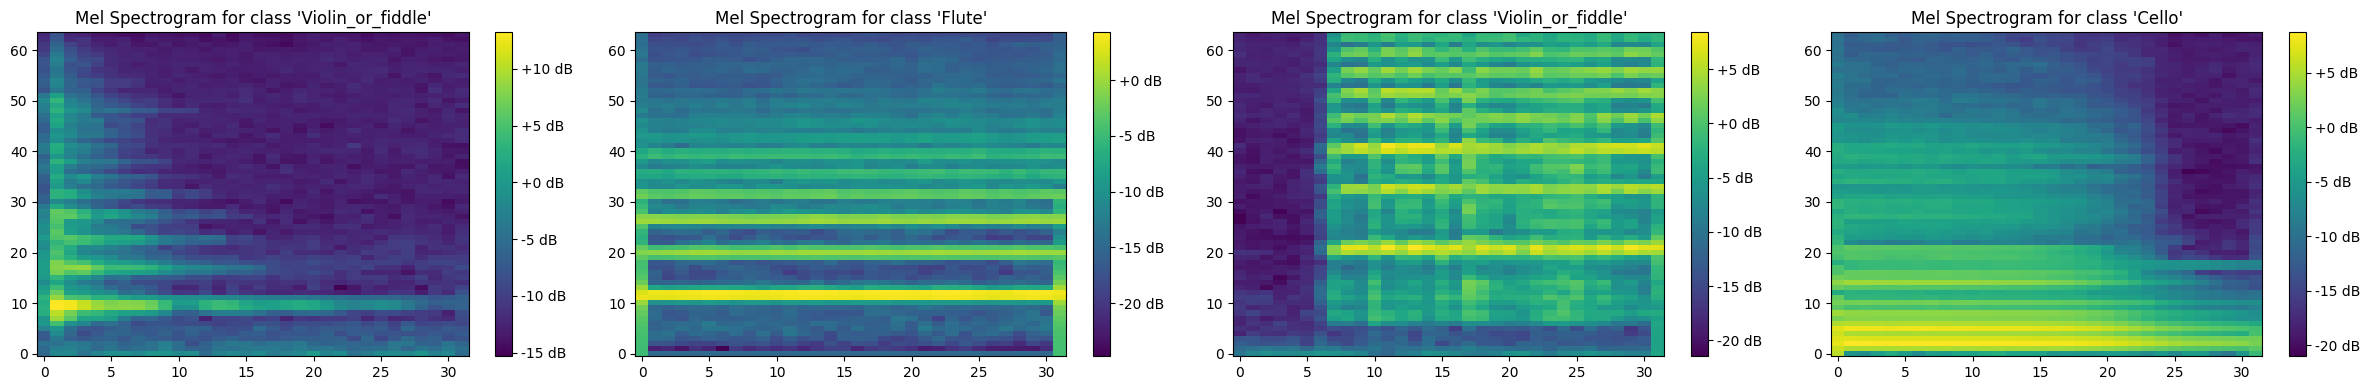

In [ ]:
#Test

BATCH_SIZE = 4
EPOCHS = 10
LEARNING_RATE = 0.001

SAMPLE_RATE = 16000
NUM_SAMPLES = SAMPLE_RATE


if torch.cuda.is_available():
  device = "cuda"
else:
  device = "cpu"
  print(f"Using {device}")

  # instantiating our dataset object and create data loader
mel_spectrogram = torchaudio.transforms.MelSpectrogram(
        sample_rate=SAMPLE_RATE,
        n_fft=1024,
        hop_length=512,
        n_mels=64)


usd_train = CustomSoundDataset(segment_df_train,
              mel_spectrogram,
              SAMPLE_RATE,
              NUM_SAMPLES,
              device)
usd_test = CustomSoundDataset(segment_df_test,
              mel_spectrogram,
              SAMPLE_RATE,
              NUM_SAMPLES,
              device)

train_loader = create_data_loader(usd_train,batch_size=4)
test_loader = create_data_loader(usd_test,batch_size=4)
print(f"The totoal number of segmented sample is {len(train_loader.dataset)}")
data, labels = next(iter(train_loader))

# Plotting all the data points (waveforms) in the batch
batch_size = data.size(0)  # Batch size
plt.figure(figsize=(6*batch_size, 4 ))
for index in range(batch_size):
    # Retrieve class name using label index
    class_name = classid2name[labels[index].item()]
    # Display the Mel spectrogram for each waveform
    print(data[index].shape)
    plt.subplot(1, batch_size, index + 1)
    plt.imshow(data[index].squeeze(0).log2().cpu().numpy(), origin='lower', aspect='auto', cmap='viridis')
    plt.title(f"Mel Spectrogram for class '{class_name}'")
    plt.colorbar(format='%+2.0f dB')

plt.tight_layout()
plt.show()

## 2.4 CNN Network Model

In [ ]:
class CNNNetwork(nn.Module):

    def __init__(self):
        super().__init__()
        # 4 conv blocks / flatten / linear / softmax
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=16,
                kernel_size=3,
                stride=1,
                padding=2
            ),
            # nn.BatchNorm2d(num_features=16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(
                in_channels=16,
                out_channels=32,
                kernel_size=3,
                stride=1,
                padding=2
            ),
            # nn.BatchNorm2d(num_features=32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(
                in_channels=32,
                out_channels=64,
                kernel_size=3,
                stride=1,
                padding=2
            ),
            # nn.BatchNorm2d(num_features=64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(
                in_channels=64,
                out_channels=128,
                kernel_size=3,
                stride=1,
                padding=2
            ),
            # nn.BatchNorm2d(num_features=128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.flatten = nn.Flatten()

        self.linear1 = nn.Linear(1920, 512)
        self.linear2 = nn.Linear(512, 10)


    def forward(self, input_data):
        x = self.conv1(input_data)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.flatten(x)
        x = self.linear1(x)
        logits = self.linear2(x)

        return logits

## 2.5 Training

### define function for plot and train

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_training(train_losses, valid_accuracies):
    epochs_range = range(1, len(train_losses) + 1)
    valid_epochs_range = range(1, len(valid_accuracies) + 1)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_losses, label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.xticks(epochs_range)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(valid_epochs_range, valid_accuracies, label='Validation Accuracy', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy')
    plt.xticks(valid_epochs_range)
    plt.legend()

    plt.tight_layout()
    plt.show()

def evaluate_confusion_matrix(model, valid_loader, device, classid2name, name):
    model.eval()
    num_batches = len(valid_loader)

    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch_inputs, batch_labels in valid_loader:
            batch_inputs = batch_inputs.to(device)
            batch_labels = batch_labels.to(device)
            batch_outputs = model(batch_inputs)

            batch_outputs_predict = batch_outputs.argmax(1)

            all_preds.extend(batch_outputs_predict.cpu().numpy())
            all_labels.extend(batch_labels.cpu().numpy())
    cm = confusion_matrix(all_preds,all_labels)
    plt.figure(figsize=(6, 4))
    unique_labels = sorted(set(all_labels))
    class_names = [classid2name[class_id] for class_id in unique_labels]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('Predicted Labels')
    plt.xlabel('True Labels')
    plt.title(name)
    plt.gca().invert_yaxis()
    plt.show()
    return

def evaluate(model, valid_loader, criterion, device):
    model.eval()
    num_batches = len(valid_loader)
    epoch_loss = 0.
    accuracy = 0.
    with torch.no_grad():
        for batch_inputs, batch_labels in valid_loader:
            batch_inputs = batch_inputs.to(device)
            batch_labels = batch_labels.to(device)
            batch_outputs = model(batch_inputs)
            epoch_loss += criterion(batch_outputs, batch_labels).item()
            batch_outputs_predict = batch_outputs.argmax(1)
            accuracy += (batch_outputs_predict == batch_labels).sum().item()
    epoch_loss /= num_batches
    accuracy /= len(valid_loader.dataset)
    return epoch_loss, accuracy


def train(model, train_data_loader, test_data_loader, loss_fn, optimizer, device, epochs, eval_interval):
    train_losses = []
    valid_losses = []
    valid_accuracies = []
    num_batches = len(train_data_loader)

    for epoch in range(epochs):
        model.train()
        # batch_losses = []
        epoch_loss = 0
        for batch_inputs, batch_labels in train_loader:
            batch_inputs = batch_inputs.to(device)
            batch_labels = batch_labels.to(device)

            # forward + backward + optimize
            outputs = model(batch_inputs)
            loss = loss_fn(outputs, batch_labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # accumulate loss
            epoch_loss += loss.item()

        epoch_loss /= num_batches
        # print training loss
        print(f'[{epoch+1}] loss: {epoch_loss:.6f}')
        train_losses.append(epoch_loss)
        # Evaluate the model on the validation set
        if (epoch + 1) % eval_interval == 0:
            valid_loss, valid_accuracy = evaluate(model, test_data_loader, loss_fn, device)
            valid_losses.append(valid_loss)
            valid_accuracies.append(valid_accuracy)
            print(f"Validation loss: {valid_loss:.4f}, Validation accuracy: {valid_accuracy:.4f}")

    print("Finished training")
    return train_losses, valid_losses, valid_accuracies

###training process

Using cuda
[1] loss: 5.798843
Validation loss: 1.9556, Validation accuracy: 0.3214
[2] loss: 1.642673
Validation loss: 1.7806, Validation accuracy: 0.3750
[3] loss: 1.814460
Validation loss: 1.7365, Validation accuracy: 0.3643
[4] loss: 2.088369
Validation loss: 3.5685, Validation accuracy: 0.4750
[5] loss: 1.525073
Validation loss: 1.2249, Validation accuracy: 0.5786
[6] loss: 1.540650
Validation loss: 1.4158, Validation accuracy: 0.5357
[7] loss: 1.243333
Validation loss: 1.4576, Validation accuracy: 0.6036
[8] loss: 1.145727
Validation loss: 1.0498, Validation accuracy: 0.6429
[9] loss: 1.107273
Validation loss: 1.2453, Validation accuracy: 0.5786
[10] loss: 1.009779
Validation loss: 1.6929, Validation accuracy: 0.5464
[11] loss: 1.117029
Validation loss: 1.1423, Validation accuracy: 0.6464
[12] loss: 0.931058
Validation loss: 1.1322, Validation accuracy: 0.6143
[13] loss: 0.960866
Validation loss: 1.2585, Validation accuracy: 0.6250
[14] loss: 0.853587
Validation loss: 1.6033, Vali

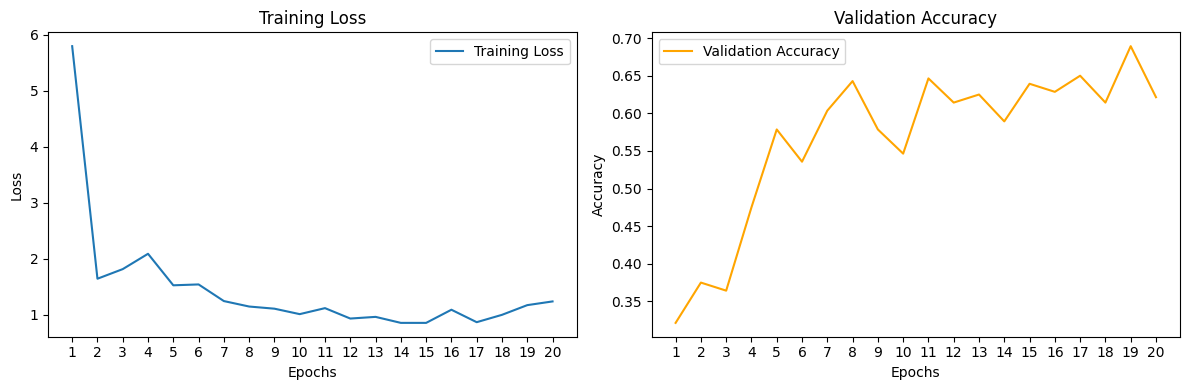

(1.6953457265294023, 0.6214285714285714)

In [ ]:
BATCH_SIZE = 5
EPOCHS = 20
LEARNING_RATE = 0.001

SAMPLE_RATE = 16000
NUM_SAMPLES = SAMPLE_RATE

if torch.cuda.is_available():
  device = "cuda"
else:
  device = "cpu"
print(f"Using {device}")

  # instantiating our dataset object and create data loader
mel_spectrogram = torchaudio.transforms.MelSpectrogram(
        sample_rate=SAMPLE_RATE,
        n_fft=1024,
        hop_length=512,
        n_mels=64)
mel_spectrogram

usd_test = CustomSoundDataset(segment_df_test,
              mel_spectrogram,
              SAMPLE_RATE,
              NUM_SAMPLES,
              device)
usd_train = CustomSoundDataset(segment_df_train,
              mel_spectrogram,
              SAMPLE_RATE,
              NUM_SAMPLES,
              device)

train_loader = create_data_loader(usd_train, BATCH_SIZE)
test_loader = create_data_loader(usd_test, BATCH_SIZE)

# construct model and assign it to device
cnn = CNNNetwork().to(device)


# initialise loss funtion + optimiser
loss_fn = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(cnn.parameters(),lr=LEARNING_RATE)

# train model
train_losses, _, valid_accuracies =train(cnn, train_loader,test_loader, loss_fn, optimiser, device, EPOCHS, 1)

# save model
torch.save(cnn.state_dict(), "cnnnet.pth")
print("Trained feed forward net saved at cnnnet.pth")

plot_training(train_losses, valid_accuracies)


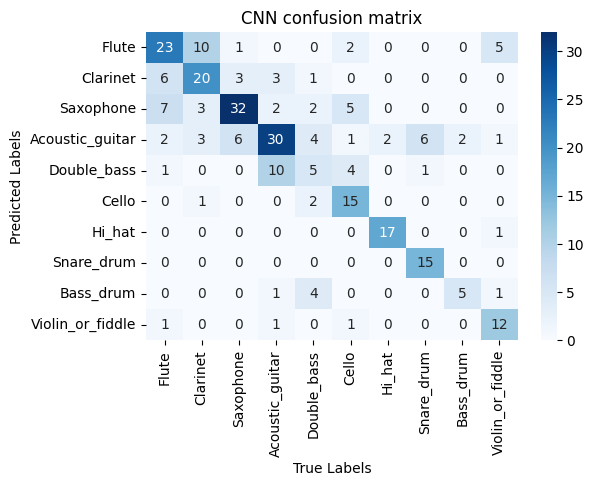

In [ ]:
evaluate_confusion_matrix(cnn, test_loader,  device, classid2name, 'CNN confusion matrix' )

## 2.6 Pretrained VGGISH

In [ ]:
from torchaudio.prototype.pipelines import VGGISH
from itertools import pairwise
class VGGishPlusMLP(nn.Module):
    def __init__(self, finetuning: bool, mlp_hidden_dimensions: tuple = ()):
        super().__init__()
        self.vggish = VGGISH.get_model()
        for param in self.vggish.parameters():
            param.requires_grad = finetuning

        in_dims = (128,) + mlp_hidden_dimensions + (10,)
        layers = []
        for in_dim, out_dim in pairwise(in_dims):
            layers.append(nn.Linear(in_features=in_dim, out_features=out_dim))
            if in_dim != in_dims[-2]:
                layers.append(nn.ReLU())
        self.mlp = nn.Sequential(*layers)

    def forward(self, x):
        x = self.vggish(x)
        logits = self.mlp(x)
        return logits

class CustomTransform:
    def __init__(self, transformation):
        self.transformation = transformation

    def __call__(self, signal):
        signal = signal.squeeze(0)
        signal = self.transformation(signal)
        signal = signal.squeeze(0)
        return signal


In [ ]:
vgg_model = VGGishPlusMLP(finetuning=False, mlp_hidden_dimensions=(64,)).to(device)

100%|██████████| 275M/275M [00:04<00:00, 60.9MB/s]


### Test VGGISH DataSet

Using cuda
torch.Size([1, 96, 64])
torch.Size([1, 96, 64])
torch.Size([1, 96, 64])
torch.Size([1, 96, 64])
torch.Size([1, 96, 64])


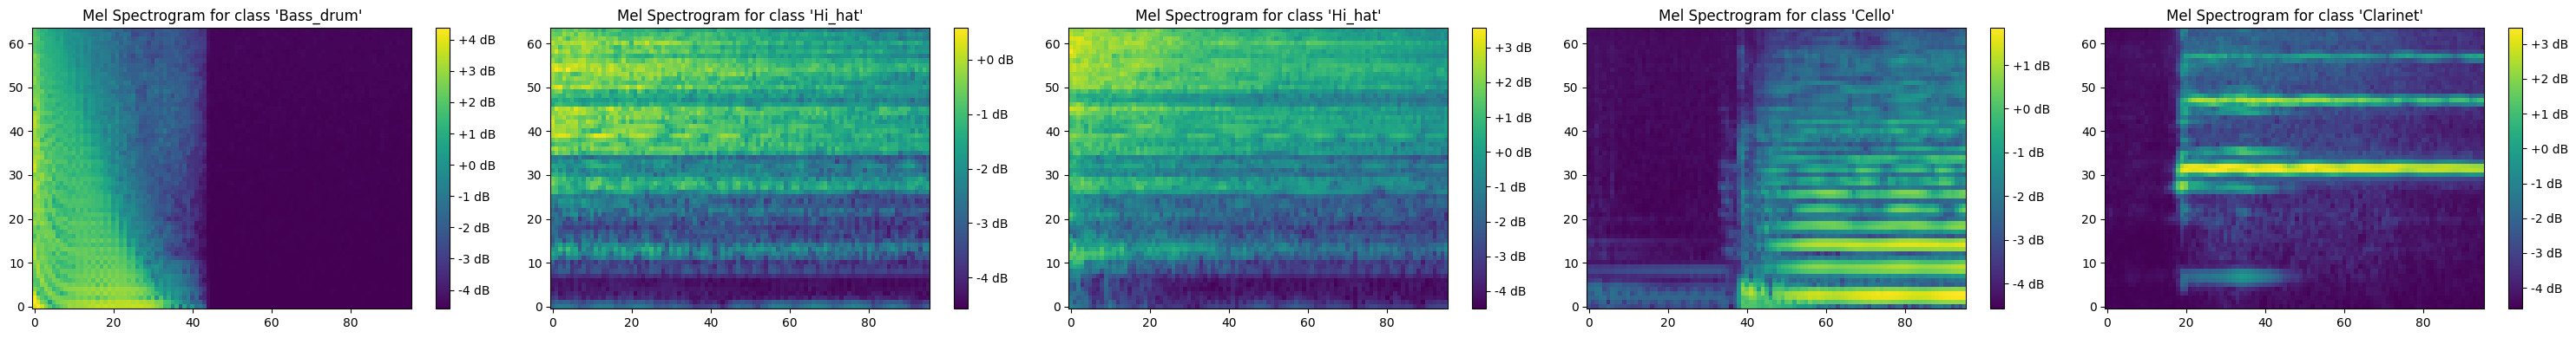

In [ ]:
SAMPLE_RATE = VGGISH.sample_rate
NUM_SAMPLES = SAMPLE_RATE
EPOCHS = 10
if torch.cuda.is_available():
  device = "cuda"
else:
  device = "cpu"
print(f"Using {device}")

mel_spectrogram = VGGISH.get_input_processor()
mel_spectrogram = CustomTransform(transformation=mel_spectrogram)

vggusd_test = CustomSoundDataset(segment_df_test,
              mel_spectrogram,
              SAMPLE_RATE,
              NUM_SAMPLES,
              device)
vggusd_train = CustomSoundDataset(segment_df_train,
              mel_spectrogram,
              SAMPLE_RATE,
              NUM_SAMPLES,
              device)

test_loader = create_data_loader(vggusd_test, BATCH_SIZE)
train_loader = create_data_loader(vggusd_train, BATCH_SIZE)

data, labels = next(iter(test_loader))

# Plotting all the data points (waveforms) in the batch
batch_size = data.size(0)  # Batch size
plt.figure(figsize=(6*batch_size, 4 ))
for index in range(batch_size):
    # Retrieve class name using label index
    class_name = classid2name[labels[index].item()]
    # Display the Mel spectrogram for each waveform
    print(data[index].shape)
    plt.subplot(1, batch_size, index + 1)
    plt.imshow(data[index].squeeze(0).permute(1,0).cpu().numpy(), origin='lower', aspect='auto', cmap='viridis')
    plt.title(f"Mel Spectrogram for class '{class_name}'")
    plt.colorbar(format='%+2.0f dB')

plt.tight_layout()
plt.show()

### Training process

Using cuda
[1] loss: 1.828050
[2] loss: 1.115505
Validation loss: 1.0313, Validation accuracy: 0.6964
[3] loss: 0.833719
[4] loss: 0.707090
Validation loss: 0.7854, Validation accuracy: 0.7571
[5] loss: 0.640398
[6] loss: 0.590474
Validation loss: 0.7561, Validation accuracy: 0.7286
[7] loss: 0.558546
[8] loss: 0.531327
Validation loss: 0.7130, Validation accuracy: 0.7571
[9] loss: 0.505127
[10] loss: 0.480070
Validation loss: 0.6712, Validation accuracy: 0.7786
[11] loss: 0.468997
[12] loss: 0.442441
Validation loss: 0.6595, Validation accuracy: 0.7964
Finished training
Trained Vggish net saved at vgg.pth


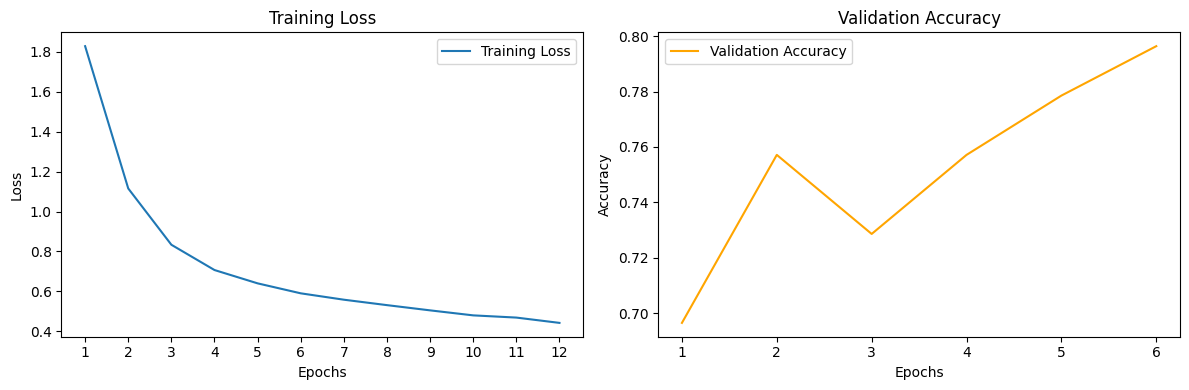

In [ ]:
SAMPLE_RATE = VGGISH.sample_rate
NUM_SAMPLES = SAMPLE_RATE
LEARNING_RATE = 0.001
EPOCHS = 12
if torch.cuda.is_available():
  device = "cuda"
else:
  device = "cpu"
print(f"Using {device}")


train_dataloader = create_data_loader(vggusd_train, BATCH_SIZE)
test_dataloader = create_data_loader(vggusd_test, BATCH_SIZE)

# construct model and assign it to device
vgg_model = vgg_model.to(device)


# initialise loss funtion + optimiser
loss_fn = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(vgg_model.parameters(),lr=LEARNING_RATE)

# train model
train_losses, _, valid_accuracies =train(vgg_model, train_dataloader, test_dataloader, loss_fn, optimiser, device, EPOCHS,2)

# save model
torch.save(vgg_model.state_dict(), "vgg.pth")
print("Trained Vggish net saved at vgg.pth")


plot_training(train_losses, valid_accuracies)

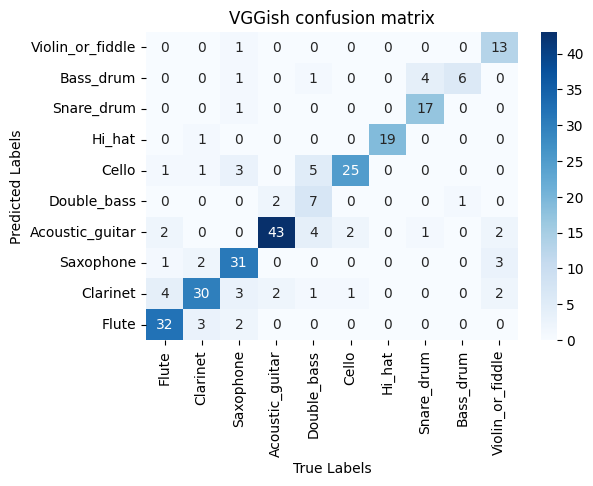

In [ ]:
evaluate_confusion_matrix(vgg_model, test_loader,  device, classid2name, 'VGGish confusion matrix' )

## 2.7 Predict music file with model

### Use the trained CNN and Vggish model to predict instrumental files

In [ ]:

def predict_audio_segments(model, file_path, target_sample_rate, segment_duration, transform, device='cpu'):

    model.to(device)
    model.eval()

    waveform, sample_rate = torchaudio.load(file_path)

    # Resample for different sample rate
    if sample_rate != target_sample_rate:
        resampler = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=target_sample_rate)
        waveform = resampler(waveform)

    if waveform.shape[0] > 1:
            waveform = torch.mean(waveform, dim=0, keepdim=True)
    num_samples_per_segment = target_sample_rate * segment_duration
    total_segments = int(waveform.size(1) / num_samples_per_segment)

    segments_list = []
    for i in range(total_segments):
        start = i * num_samples_per_segment
        end = start + num_samples_per_segment
        segment = waveform[:, start:end].to(device)
        segment = transform(segment)
        segments_list.append(segment.unsqueeze(0))

    with torch.no_grad():
       segments_batch = torch.cat(segments_list, dim=0)

       outputs = model(segments_batch)
       outputs = outputs.cpu().argmax(1)
       max, predicted_indices = outputs.max(0)

    print(max)
    predicted = classid2name[max.item()]
    return predicted

cnn_predict = CNNNetwork()
state_dict = torch.load("cnnnet.pth")
cnn_predict.load_state_dict(state_dict)

vgg_predict = VGGishPlusMLP(finetuning=False, mlp_hidden_dimensions=(64,))
state_dict = torch.load("vgg.pth")
vgg_predict.load_state_dict(state_dict)

# test_path = 'dataset/wavfiles/Clarinet/ce65d6b5.wav'
test_path = 'dataset/wavfiles/Saxophone/ec6afeb6.wav'
mel_spectrogram = VGGISH.get_input_processor()
custom_transform = CustomTransform(transformation=mel_spectrogram)
predict_name = predict_audio_segments(vgg_predict, test_path, SAMPLE_RATE, 1, custom_transform, "cpu")
print(predict_name)

mel_spectrogram = torchaudio.transforms.MelSpectrogram(
        sample_rate=SAMPLE_RATE,
        n_fft=1024,
        hop_length=512,
        n_mels=64
    )
custom_transform = mel_spectrogram
predict_name = predict_audio_segments(cnn_predict, test_path, SAMPLE_RATE, 1, custom_transform, "cpu")
print(predict_name)


tensor(2)
Saxophone
tensor(2)
Saxophone


In [ ]:

test_path = 'spleeter/audio/bass.wav'
predict_name = predict_audio_segments(cnn_predict, test_path, SAMPLE_RATE, 1, custom_transform, "cpu")
print(predict_name)

tensor(8)
Bass_drum
